-----------
Initializing structure...
time for choose_chunkdivision = 0.00030899 s
Working in 2D dimensions.
Computational cell is 14 x 14 x 0 with resolution 50
time for set_epsilon = 0.260919 s
-----------
run 0 finished at t = 20.0 (2000 timesteps)


<Axes: xlabel='X', ylabel='Y'>

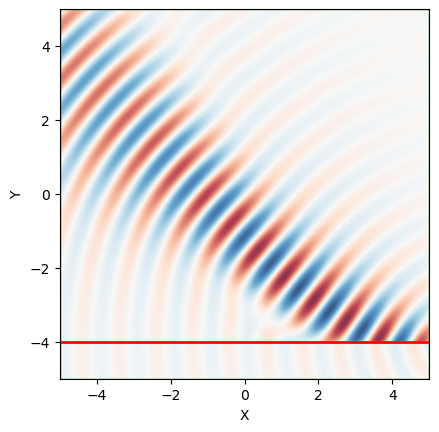

In [4]:
## launch a Gaussian beam
import math

import matplotlib

import meep as mp

import matplotlib.pyplot as plt

s = 14
resolution = 50
dpml = 2

cell_size = mp.Vector3(s, s)

boundary_layers = [mp.PML(thickness=dpml)]

beam_x0 = mp.Vector3(0, 3.0)  # beam focus (relative to source center)
rot_angle = 60  # CCW rotation angle about z axis (0: +y axis)
beam_kdir = mp.Vector3(0, 1, 0).rotate(
    mp.Vector3(0, 0, 1), math.radians(rot_angle)
)  # beam propagation direction
beam_w0 = 0.8  # beam waist radius
beam_E0 = mp.Vector3(0, 0, 1)
fcen = 1
sources = [
    mp.GaussianBeamSource(
        src=mp.ContinuousSource(fcen),
        center=mp.Vector3(0, -0.5 * s + dpml + 1.0),
        size=mp.Vector3(s),
        beam_x0=beam_x0,
        beam_kdir=beam_kdir,
        beam_w0=beam_w0,
        beam_E0=beam_E0,
    )
]

sim = mp.Simulation(
    resolution=resolution,
    cell_size=cell_size,
    boundary_layers=boundary_layers,
    sources=sources,
)

sim.run(until=20)

sim.plot2D(
    fields=mp.Ez,
    output_plane=mp.Volume(
        center=mp.Vector3(), size=mp.Vector3(s - 2 * dpml, s - 2 * dpml)
    ),
)


# plt.savefig(f"Ez_angle{rot_angle}.png", bbox_inches="tight", pad_inches=0)

In [29]:
import meep as mp
import numpy as np  # numpy 사용

# 기본 시뮬레이션 설정
resolution = 50  # 픽셀/μm 단위 해상도
cell_size = mp.Vector3(4, 4, 0)  # 2D 시뮬레이션 (z=0)

# 내부 매질 굴절률 설정
n = 1.68
medium = mp.Medium(index=n)

# 입사각 설정 (예: 45도)
theta = 20
theta_rad = np.radians(theta)  # 라디안 변환

# 파수 벡터 설정 (입사 방향 설정용)
k = mp.Vector3(
    n * np.sin(theta_rad),   # x 방향
    -n * np.cos(theta_rad),  # y 방향 (아래쪽으로 입사)
    0
)

# 중심 주파수 (1 μm 기준일 경우 1.0이 1 μm 파장을 의미)
fcen = 1.0

# 평면파 연속 소스 정의 (입사 방향: 아래쪽)
# source = mp.EigenModeSource(
#     src=mp.ContinuousSource(frequency=fcen),  # 시간적으로 감쇠 없는 연속파
#     center=mp.Vector3(0, 1.5),                # 소스 위치 (위에서 아래로 입사)
#     size=mp.Vector3(4, 0, 0),                 # x 방향 전체에 걸친 소스
#     direction=mp.NO_DIRECTION,                # 방향은 k로 설정
#     eig_kpoint=k,                             # 입사 파수 벡터
#     eig_match_freq=True,                      # 주파수에 맞춰 eig 모드 설정
#     eig_parity=mp.ODD_Z + mp.EVEN_Y           # TM 모드 (필요시 조정 가능)
# )

source = mp.EigenModeSource(
    src=mp.ContinuousSource(frequency=fcen, is_integrated=True),
    center=mp.Vector3(0, 1.6),
    size=mp.Vector3(cell_size.x, 0, 0),
    direction=mp.NO_DIRECTION,
    eig_kpoint=k,
    eig_match_freq=True,
    eig_parity=mp.ODD_Z + mp.EVEN_Y,
    
)


# 시뮬레이션 객체 생성
sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=[mp.PML(thickness=0.3)],      # 경계 반사 방지를 위한 PML
    geometry=[],                        # geometry 없음 (균일 매질)
    sources=[source],
    resolution=resolution,
    default_material=medium,            # 전체 영역에 굴절률 1.68 적용
    
)



In [30]:
import matplotlib.pyplot as plt
import imageio.v2 as imageio  # gif 생성을 위한 라이브러리
import os

# 프레임 저장용 폴더 및 리스트
frame_folder = "frames"
os.makedirs(frame_folder, exist_ok=True)
gif_frames = []

# 총 시간과 프레임 수
total_time = 100
frame_interval = 1  # 1 time unit 마다 저장
num_frames = int(total_time / frame_interval)

# 시뮬레이션 초기화

for i in range(num_frames):
    sim.run(until=frame_interval * (i + 1))
    
    # 필드 시각화 (Ez)
    plt.figure(dpi=100)
    sim.plot2D(fields=mp.Ez)
    plt.axis('off')

    frame_path = f"{frame_folder}/frame_{i:04d}.png"
    plt.savefig(frame_path, bbox_inches='tight', pad_inches=0)
    plt.close()
    
    gif_frames.append(imageio.imread(frame_path))

# gif 저장
imageio.mimsave("field_ez.gif", gif_frames, duration=0.5)  # duration은 프레임당 시간(sec)

print("✅ field_ez.gif 생성 완료!")

-----------
Initializing structure...
time for choose_chunkdivision = 0.000100136 s
Working in 2D dimensions.
Computational cell is 4 x 4 x 0 with resolution 50
time for set_epsilon = 0.0210021 s
-----------
MPB solved for frequency_1(0.574594,-1.57868,0) = 1.00101 after 41 iters
MPB solved for frequency_1(0.574012,-1.57708,0) = 1 after 12 iters
MPB solved for frequency_1(0.574012,-1.57708,0) = 1 after 1 iters
run 0 finished at t = 1.0 (100 timesteps)
run 1 finished at t = 3.0 (300 timesteps)
run 2 finished at t = 6.0 (600 timesteps)
run 3 finished at t = 10.0 (1000 timesteps)
run 4 finished at t = 15.0 (1500 timesteps)
run 5 finished at t = 21.0 (2100 timesteps)
run 6 finished at t = 28.0 (2800 timesteps)
run 7 finished at t = 36.0 (3600 timesteps)
run 8 finished at t = 45.0 (4500 timesteps)
run 9 finished at t = 55.0 (5500 timesteps)
run 10 finished at t = 66.0 (6600 timesteps)
run 11 finished at t = 78.0 (7800 timesteps)
run 12 finished at t = 91.0 (9100 timesteps)
run 13 finished a